<a href="https://colab.research.google.com/github/soheilpaper/-tft-2.4-ili9341-STM32/blob/master/Kitti_Database_Downloding_and_Converting_to_XML_(garbage-classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## inserting the KITTI - Object Detection
Detect and localize multiple Classes in images
 
KITTI Object Detection with Bounding Boxes – Taken from the benchmark suite from the Karlsruhe Institute of Technology, this dataset consists of images from the object detection section of that suite. This image dataset includes over 14,000 images made up of 7,518 testing images and 7,481 training images with bounding boxes labels in a separate file.
 
https://www.kaggle.com/twaldo/kitti-object-detection

# First of all get The **kaggle.json** file from this link, as you can see blowe:


```
*   https://www.kaggle.com/<your Account)/account

```



![enter image description here](https://i.stack.imgur.com/Uz4KW.png)

Then Upload the **kaggle.json** by Blow code:


In [2]:
from google.colab import files
files.upload()
 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elasagroup","key":"239b179d194e8e14d26c8fcdc7e487f1"}'}

In [3]:
!mkdir -p ~/.kaggle
 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
 
 
!pip install kaggle 
#!sudo apt install kaggle 
!kaggle datasets download -d sotest/garbage-classification

404 - Not Found


## Location of the Images:
![enter image description here](https://i.stack.imgur.com/uOScc.png)






In [ ]:
!ls
!unzip /content/waste-classification-data.zip

# Seeing the Kitti databse contents

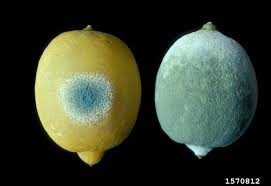

In [ ]:
from IPython.display import Image
Image('/content/DATASET/TRAIN/O/O_10000.jpg')

In [ ]:
# !cat /content/kitti_single/training/label_2/000000.txt

Youcan run the dataset by using the codes from This kaggle dataset community:

https://www.kaggle.com/kairess/garbage-classification
![image](https://i.stack.imgur.com/Ft3ds.png)




---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

In [ ]:
base_path = '../input/garbage classification/Garbage classification'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

In [ ]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

# Take a Shot

In [ ]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

# Another Shot

In [ ]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

In [ ]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

In [ ]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

In [ ]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

In [ ]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])